In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from sklearn import ensemble
from sklearn.metrics import plot_confusion_matrix


# Carregando o dataset 

In [86]:
dataset = pd.read_csv("https://raw.githubusercontent.com/RHero-UFRPE/RHero-ML/master/WA_Fn-UseC_-HR-Employee-Attrition.csv")
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


Pré processamento de dados 

## Transformação de variáveis categóricas em variáveis quantitativas

In [87]:

attrition_map = {'Yes' : 1, 'No' : 0}
dataset['Attrition'] = dataset['Attrition'].map(attrition_map)
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [88]:
dataset['BusinessTravel'].describe()


count              1470
unique                3
top       Travel_Rarely
freq               1043
Name: BusinessTravel, dtype: object

In [89]:
map = {'Travel_Rarely' : 1, 'Travel_Frequently' : 2, 'Non-Travel' : 3}
dataset['BusinessTravel'] = dataset['BusinessTravel'].map(map)
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,2,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,1,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,2,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,1,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [90]:
departament_map = {'Sales' : 1, 'Research & Development' : 2, 'Human Resources' : 3}
dataset['Department'] = dataset['Department'].map(departament_map)
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,1,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,2,279,2,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,1,1373,2,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,2,1392,2,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,1,591,2,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [91]:
educationField_map = {'Life Sciences' : 1, 'Other' : 2, 'Medical' : 3, 'Marketing' : 4, 'Technical Degree' : 5, 'Human Resources' : 6}
dataset['EducationField'] = dataset['EducationField'].map(educationField_map)
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,1,1,2,1,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,2,279,2,8,1,1,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,1,1373,2,2,2,2,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,2,1392,2,3,4,1,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,1,591,2,2,1,3,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [92]:
gender_map = {'Female' : 0, 'Male' : 1}
dataset['Gender'] = dataset['Gender'].map(gender_map)
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,1,1,2,1,1,1,2,0,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,2,279,2,8,1,1,1,2,3,1,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,1,1373,2,2,2,2,1,4,4,1,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,2,1392,2,3,4,1,1,5,4,0,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,1,591,2,2,1,3,1,7,1,1,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [93]:
jobRole_map = {'Sales Executive' : 1, 'Research Scientist' : 2, 'Laboratory Technician' : 3, 'Manufacturing Director' : 4, 'Healthcare Representative' : 5, 'Manager' : 6, 'Sales Representative' : 7, 'Research Director' : 8, 'Human Resources' : 9}
dataset['JobRole'] = dataset['JobRole'].map(jobRole_map)
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,1,1,2,1,1,1,2,0,94,3,2,1,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,2,279,2,8,1,1,1,2,3,1,61,2,2,2,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,1,1373,2,2,2,2,1,4,4,1,92,2,1,3,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,2,1392,2,3,4,1,1,5,4,0,56,3,1,2,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,1,591,2,2,1,3,1,7,1,1,40,3,1,3,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [94]:
maritalStatus_map = {'Single' : 1, 'Married' : 2, 'Divorced' : 3}
dataset['MaritalStatus'] = dataset['MaritalStatus'].map(maritalStatus_map)
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,1,1,2,1,1,1,2,0,94,3,2,1,4,1,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,2,279,2,8,1,1,1,2,3,1,61,2,2,2,2,2,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,1,1373,2,2,2,2,1,4,4,1,92,2,1,3,3,1,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,2,1392,2,3,4,1,1,5,4,0,56,3,1,2,3,2,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,1,591,2,2,1,3,1,7,1,1,40,3,1,3,2,2,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [95]:
overTime_map = {'Yes' : 1, 'No' : 2}
dataset['OverTime'] = dataset['OverTime'].map(overTime_map)
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,1,1,2,1,1,1,2,0,94,3,2,1,4,1,5993,19479,8,Y,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,2,279,2,8,1,1,1,2,3,1,61,2,2,2,2,2,5130,24907,1,Y,2,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,1,1373,2,2,2,2,1,4,4,1,92,2,1,3,3,1,2090,2396,6,Y,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,2,1392,2,3,4,1,1,5,4,0,56,3,1,2,3,2,2909,23159,1,Y,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,1,591,2,2,1,3,1,7,1,1,40,3,1,3,2,2,3468,16632,9,Y,2,12,3,4,80,1,6,3,3,2,2,2,2


## Tabela de correlação 

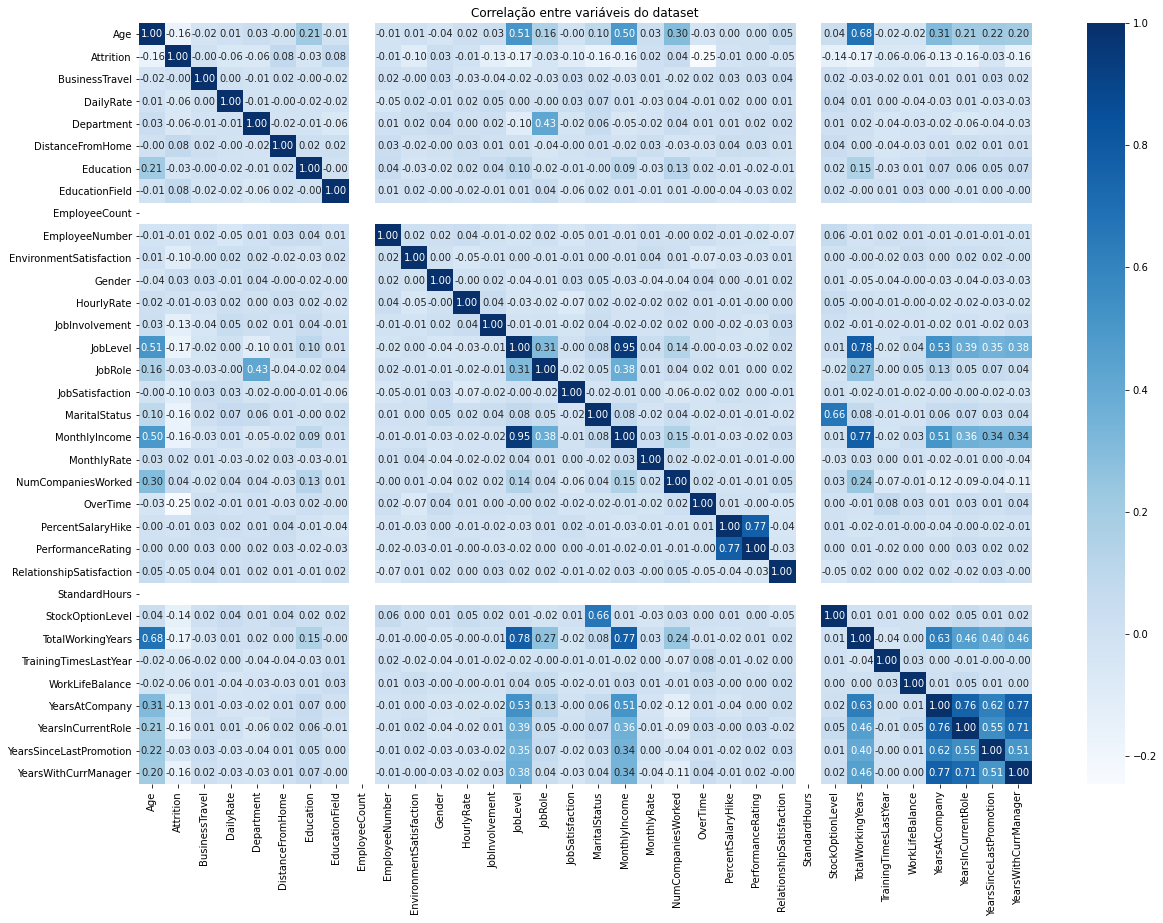

In [96]:
plt.figure(figsize=(20, 14))
sns.heatmap(dataset.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset')
plt.show()

## Mudando o índice do Attrition para facilitar o slicing entre atributos e target 

In [97]:
dataset = dataset.reindex(columns=(['Attrition'] + list([a for a in dataset.columns if a != 'Attrition']) ))
dataset.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,1,1102,1,1,2,1,1,1,2,0,94,3,2,1,4,1,5993,19479,8,Y,1,11,3,1,80,0,8,0,1,6,4,0,5
1,0,49,2,279,2,8,1,1,1,2,3,1,61,2,2,2,2,2,5130,24907,1,Y,2,23,4,4,80,1,10,3,3,10,7,1,7
2,1,37,1,1373,2,2,2,2,1,4,4,1,92,2,1,3,3,1,2090,2396,6,Y,1,15,3,2,80,0,7,3,3,0,0,0,0
3,0,33,2,1392,2,3,4,1,1,5,4,0,56,3,1,2,3,2,2909,23159,1,Y,1,11,3,3,80,0,8,3,3,8,7,3,0
4,0,27,1,591,2,2,1,3,1,7,1,1,40,3,1,3,2,2,3468,16632,9,Y,2,12,3,4,80,1,6,3,3,2,2,2,2


## Realizando o drop de atributos com valor único nos registros 

In [98]:
atributos = dataset.iloc[:,1:]
target = dataset['Attrition']
print("Shape original: ", atributos.shape)
atributos.drop(['Over18', 'EmployeeCount', 'StandardHours'], axis=1, inplace=True)
print("Shape pós remoção: ", atributos.shape)
atributos

Shape original:  (1470, 34)
Shape pós remoção:  (1470, 31)


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,1,2,1,1,2,0,94,3,2,1,4,1,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,2,279,2,8,1,1,2,3,1,61,2,2,2,2,2,5130,24907,1,2,23,4,4,1,10,3,3,10,7,1,7
2,37,1,1373,2,2,2,2,4,4,1,92,2,1,3,3,1,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,2,1392,2,3,4,1,5,4,0,56,3,1,2,3,2,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,1,591,2,2,1,3,7,1,1,40,3,1,3,2,2,3468,16632,9,2,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,2,884,2,23,2,3,2061,3,1,41,4,2,3,4,2,2571,12290,4,2,17,3,3,1,17,3,3,5,2,0,3
1466,39,1,613,2,6,1,3,2062,4,1,42,2,3,5,1,2,9991,21457,4,2,15,3,1,1,9,5,3,7,7,1,7
1467,27,1,155,2,4,3,1,2064,2,1,87,4,2,4,2,2,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,2,1023,1,2,3,3,2065,4,1,63,2,2,1,2,2,5390,13243,2,2,14,3,4,0,17,3,2,9,6,0,8


## Aplicando o Feature Importance

In [99]:
#Dividindo o dataset em variáveis para o teste e para o treino
atributos_train, atributos_test, target_train, target_test = train_test_split(atributos, target, random_state=42)

model  = RandomForestClassifier(random_state= 42)
model.fit(atributos_train, target_train.ravel())
importance = model.feature_importances_

## Exibindo atributos do Feature Importance 

In [114]:
colunas = atributos.columns
colunas

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [101]:
importance

array([0.06102303, 0.01295626, 0.05188982, 0.01220669, 0.03955095,
       0.01727956, 0.02709633, 0.04839588, 0.02819405, 0.00933678,
       0.04358842, 0.01901126, 0.01990929, 0.02837333, 0.02330286,
       0.02595913, 0.0825958 , 0.04552823, 0.03549125, 0.05838936,
       0.02955899, 0.00311239, 0.0226939 , 0.02951912, 0.04824284,
       0.0261686 , 0.02154709, 0.04675303, 0.02728969, 0.02123966,
       0.03379641])

Text(0.5, 1.0, 'Importância de cada feature')

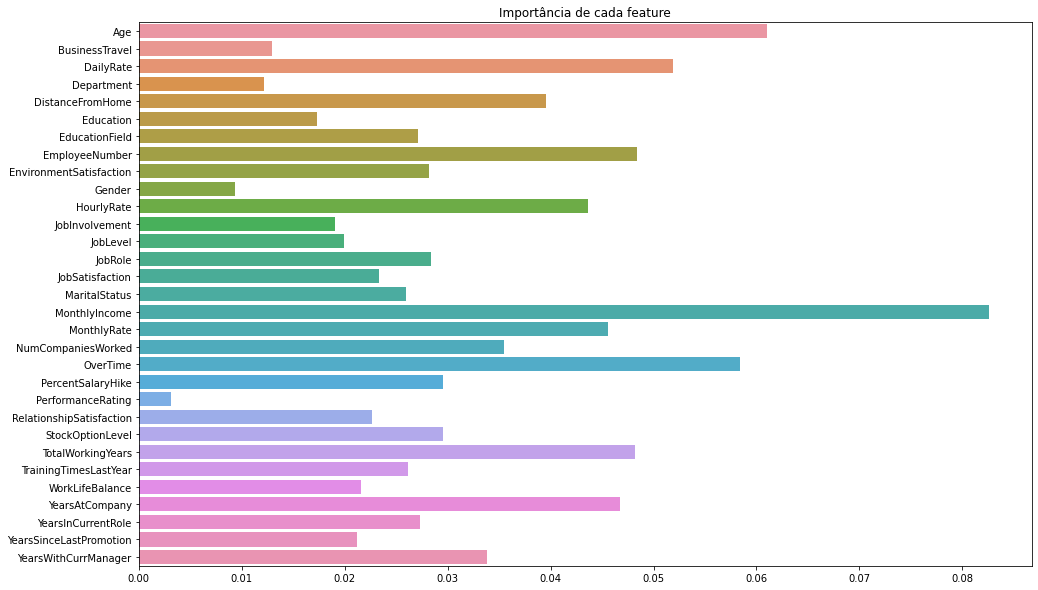

In [102]:
importances = pd.Series(data=model.feature_importances_, index=atributos.columns)
plt.figure(figsize=(16, 10))
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')


In [103]:
dic = {}

for i in range(len(colunas)):
  dic[colunas[i]] = importance[i]

for x in dic:
  print(str(x) + ' : ' +  str(dic[x]))



Age : 0.0610230251285062
BusinessTravel : 0.01295625836645842
DailyRate : 0.0518898232351182
Department : 0.012206685453720544
DistanceFromHome : 0.03955095023307915
Education : 0.017279557896163106
EducationField : 0.027096330031683186
EmployeeNumber : 0.04839587846267628
EnvironmentSatisfaction : 0.028194053121048716
Gender : 0.00933678363651528
HourlyRate : 0.04358841507901523
JobInvolvement : 0.019011256372647955
JobLevel : 0.019909285050695943
JobRole : 0.02837333097441429
JobSatisfaction : 0.023302860891432676
MaritalStatus : 0.02595913099612457
MonthlyIncome : 0.08259580391287887
MonthlyRate : 0.045528234482270974
NumCompaniesWorked : 0.03549125239738661
OverTime : 0.05838935825991445
PercentSalaryHike : 0.02955898736611834
PerformanceRating : 0.0031123918728402293
RelationshipSatisfaction : 0.022693904518456372
StockOptionLevel : 0.029519118381917914
TotalWorkingYears : 0.04824283773749765
TrainingTimesLastYear : 0.026168598704986962
WorkLifeBalance : 0.021547092728988696
Years

# Aplicação dos Modelos 

## Random Forest 

In [104]:
# Frequência da divisão do dataset em parte de treino e de teste 
print("{0:0.2f}% nos dados de treino". format((len(atributos_train)/len(atributos.index)) * 100 ))
print("{0:0.2f}% nos dados de teste". format((len(atributos_test)/len(atributos.index)) * 100 ))

74.97% nos dados de treino
25.03% nos dados de teste


In [105]:
#Frequência do atributo Attrition na base de treino
target_train.value_counts()


0    913
1    189
Name: Attrition, dtype: int64

In [106]:
#Frequência do atributo Attrition na base de treino
target_test.value_counts()

0    320
1     48
Name: Attrition, dtype: int64

In [107]:
#Aplicando o modelo
predict_RF = model.predict(atributos_test)
print("Acurácia do modelo: {0:.2f}%".format(metrics.accuracy_score(target_test, predict_RF) * 100))

Acurácia do modelo: 87.23%


In [108]:
#Confusion Matrix e Classification Report

print("Confusion Matrix")
print("")

print("{0}".format(metrics.confusion_matrix(target_test, predict_RF, labels = [1,0])))
print(" ")

print("Classification Report")
print("")

print(metrics.classification_report(target_test, predict_RF, labels = [1,0]))

Confusion Matrix

[[  5  43]
 [  4 316]]
 
Classification Report

              precision    recall  f1-score   support

           1       0.56      0.10      0.18        48
           0       0.88      0.99      0.93       320

    accuracy                           0.87       368
   macro avg       0.72      0.55      0.55       368
weighted avg       0.84      0.87      0.83       368



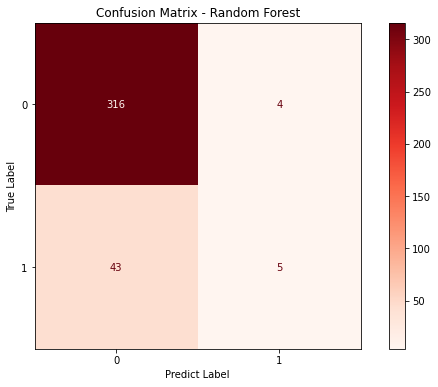

In [109]:
matrix_RF = plot_confusion_matrix(model, atributos_test, target_test, cmap=plt.cm.Reds, values_format = '.5g')
matrix_RF.ax_.set_title('Confusion Matrix - Random Forest', color = 'black')
plt.xlabel('Predict Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()

## Gradiente Boosting

In [110]:
modelo_GB = ensemble.GradientBoostingClassifier(n_estimators=100)
modelo_GB.fit(atributos_train, target_train.ravel())
predict_GB = modelo_GB.predict(atributos_test)
print("Acurácia do modelo: {0:.2f}%".format(metrics.accuracy_score(target_test, predict_GB) * 100))

Acurácia do modelo: 86.96%


In [111]:
#Confusion Matrix e Classification Report

print("Confusion Matrix")
print("")

print("{0}".format(metrics.confusion_matrix(target_test, predict_GB, labels = [1,0])))
print(" ")

print("Classification Report")
print("")

print(metrics.classification_report(target_test, predict_GB, labels = [1,0]))

Confusion Matrix

[[ 12  36]
 [ 12 308]]
 
Classification Report

              precision    recall  f1-score   support

           1       0.50      0.25      0.33        48
           0       0.90      0.96      0.93       320

    accuracy                           0.87       368
   macro avg       0.70      0.61      0.63       368
weighted avg       0.84      0.87      0.85       368



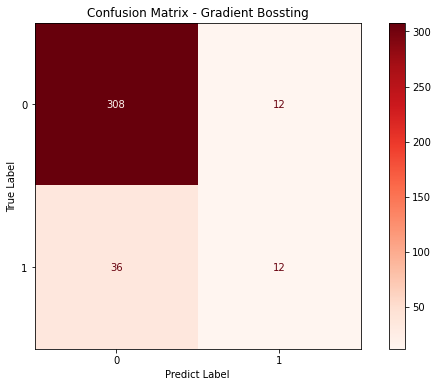

In [112]:
matrix = plot_confusion_matrix(modelo_GB, atributos_test, target_test, cmap=plt.cm.Reds, values_format = '.5g')
matrix.ax_.set_title('Confusion Matrix - Gradient Bossting', color = 'black')
plt.xlabel('Predict Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()